## ATTEMPT AT VALIDATION WITH SCRAPED MP OPINIONS

In [158]:
import requests
import time
from tqdm.notebook import tqdm
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json

constituencies = {
    '9000100': 'København',
    '9000200': 'Københavns Omegn',
    '9000300': 'Nordsjælland',
    '9000400': 'Bornholm',
    '9000500': 'Sjælland',
    '9000600': 'Fyn',
    '9000700': 'Sydjylland',
    '9000800': 'Østjylland',
    '9000900': 'Vestjylland',
    '9001000': 'Nordjylland'
}

# for const in tqdm(constituencies.keys()):
#     url = 'https://election-api.services.tv2.dk/fv/fv22/candidatetest/answers/' + const
#     r = requests.get(url)
#     data = r.json()
#     with open('validation/candidates_' + const + '.json', 'w') as f:
#         json.dump(data, f)
    
#     time.sleep(20)


In [159]:
# load and merge all the json files
import pandas as pd

path = r'validation' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    with open(filename) as f:
        data = json.load(f)
    li.append(pd.DataFrame(data))

can = pd.concat(li, axis=0, ignore_index=True)

In [160]:
# unpack answers column
can = can.join(pd.json_normalize(can['answers']))

In [161]:
for i, key in enumerate(list(can.answers[0].keys())[1:25]):
    can[key] = can['answers'].apply(lambda x: x[key]['answer'])

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [162]:
# drop unnecessary columns
can = can[[
    'name',
    'partyLetter',
    '1a',
    '1b',
    '2a',
    '2b',
    '3a',
    '3b',
    '4a',
    '4b',
    '5a',
    '5b',
    '6a',
    '6b',
    '7a',
    '7b',
    '8a',
    '8b',
    '9a',
    '9b',
    '10a',
    '10b',
    '11a',
    '11b',
    '12a',
    '12b'
    ]]

In [163]:
varmap = {
    '1a': 'okse_afgift',
    '1b': 'co2_afgift',
    '2a': 'lon_sundhed',
    '2b': 'cig_afgift',
    '3a': '2pct_bnp',
    '3b': 'ulbist_op',
    '4a': 'ulig_mindsk',
    '4b': 'inflat_komp',
    '5a': 'brugerbet_aeldre',
    '5b': 'ress_aeldre',
    '6a': 'udl_for_stram',
    '6b': 'asyl_rwanda',
    '7a': 'atomkraft_ja',
    '7b': 'uaf_rus_en',
    '8a': 'ress_pysk_ung',
    '8b': 'ress_pas_boern',
    '9a': 'su_laan',
    '9b': 'skol_inklus',
    '10a': 'for_hoej_overf',
    '10b': 'behold_arne',
    '11a': 'mette_rigtig',
    '11b': 'mette_rigsret',
    '12a': 'corona_aaben',
    '12b': 'krav_test_uvac'
}

In [164]:
# partymap
partymap = {
    'v': 'V',
    'o': 'DF',
    'b': 'RV',
    'ø': 'EL',
    'c': 'KF',
    'i': 'LA',
    'd': 'NB',
    'f': 'SF',
    'å': 'ALT',
    'm': 'M',
    'æ': 'DD',
    'k': 'KD',
    'a': 'S',
    'q': 'FG',
    '': np.nan
    }

In [165]:
colormap = {
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B',
    'SIU': 'lightgrey',
    'UFG': 'lightgrey'
}

In [166]:
# map variable names
can = can.rename(columns=varmap)

# map party names
can['partyLetter'] = can['partyLetter'].map(partymap)

In [167]:
# apply rescale function to all numeric variables in can
def rescale(var):
    var = (var - var.min()) / (var.max() - var.min())
    var = 2 * var - 1
    return var

numeric = can.select_dtypes(include=['float64', 'int64']).columns

# rescale all numeric
for var in numeric:
    can[var] = rescale(can[var])


In [168]:
# map colors
can['color'] = can['partyLetter'].map(colormap)

In [169]:
can

,name,partyLetter,okse_afgift,co2_afgift,lon_sundhed,cig_afgift,2pct_bnp,ulbist_op,ulig_mindsk,inflat_komp,...,ress_pas_boern,su_laan,skol_inklus,for_hoej_overf,behold_arne,mette_rigtig,mette_rigsret,corona_aaben,krav_test_uvac,color
0,Anita Vivi Lilholt,V,-1.0,-0.5,0.0,0.0,0.0,-1.0,-0.5,0.5,...,0.0,0.5,0.0,0.5,0.0,-1.0,1.0,0.0,0.0,#1A4289
1,Anne Honoré Østergaard,V,-1.0,-0.5,0.5,1.0,0.5,-0.5,0.0,0.5,...,0.5,-0.5,0.0,0.5,0.0,-1.0,1.0,0.5,-0.5,#1A4289
2,Henrik Buchhave,V,-1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.5,...,0.0,0.0,-1.0,1.0,1.0,-1.0,0.5,1.0,0.0,#1A4289
3,Maja Torp,V,-0.5,0.0,0.5,0.0,0.5,-0.5,0.0,0.0,...,0.5,0.0,-0.5,0.5,0.0,-0.5,0.5,0.5,0.5,#1A4289
4,Marie Bjerre,V,-0.5,0.0,0.5,0.5,1.0,-0.5,0.0,0.5,...,0.5,-0.5,0.0,0.5,0.0,-1.0,1.0,0.5,-1.0,#1A4289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Kris Jensen Skriver,S,0.5,0.5,0.5,1.0,-0.5,0.0,0.5,0.5,...,-0.5,-0.5,-0.5,-0.5,1.0,0.5,-1.0,0.0,-0.5,#C8042C
958,Niels Ole Beck,S,-0.5,0.5,0.5,0.5,-0.5,0.0,0.5,0.0,...,0.0,-1.0,0.0,-0.5,1.0,1.0,-1.0,0.0,0.0,#C8042C
959,Theis Kylling Hommeltoft,S,1.0,-0.5,1.0,0.5,-0.5,-0.5,0.5,-0.5,...,0.5,-0.5,-0.5,-0.5,0.5,1.0,-1.0,0.5,1.0,#C8042C
960,Marianne Karlberg,FG,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-0.5,...,-1.0,-1.0,-1.0,-0.5,1.0,-1.0,1.0,0.0,1.0,#E4F04E


In [170]:
# Imports
from politician2vec import Politician2Vec
from politician2vec.utils import *
import pickle

# Specify path to preprocessed dataset
test_data_path = 'data/clean/preprocessed_docs.p'
# We remove North-Atlantic politicians due to them skewing the corpus with very few, concentrated observations
parl_data = pd.read_pickle(test_data_path).query("party not in ['SIU', 'NQ', 'JF', 'SP']")
parl_data.shape
parl_data['party'].value_counts()
parl_data['party'].value_counts(dropna = False)
grouped_docs = parl_data.groupby(['full_name', 'party'])['doc'].apply('. '.join).reset_index()
docs = [doc for doc in grouped_docs.doc]
parties = np.array([party for party in grouped_docs.party])

In [171]:
# drop all obs from can if name not in grouped_docs['full_name']
can = can[can['name'].isin(grouped_docs['full_name'])]

In [394]:
# flip variables in can
flip_vars = [
    'brugerbet_aeldre',
    'for_hoej_overf',
    'su_laan',
    'asyl_rwanda',
    'atomkraft_ja',
    '2pct_bnp'
]

for var in flip_vars:
    can[var] = can[var] * -1

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [403]:
# 'ulig_mindsk'
# 'inflat_komp'
# 'brugerbet_aeldre'
# 'for_hoej_overf'
# 'cig_afgift'
# 'ulbist_op'
# 'lon_sundhed'
# 'su_laan'
# 'ress_aeldre'
# 'ress_pysk_ung'
# 'ress_pas_boern'

#create a correlation matrix of these variables
# can[[
#     'ulig_mindsk',
#     'inflat_komp',
#     #'brugerbet_aeldre',
#     'for_hoej_overf',
#     #'cig_afgift',
#     'ulbist_op',
#     'lon_sundhed',
#     'su_laan',
#     #'ress_aeldre',
#     #'ress_pysk_ung',
#     #'ress_pas_boern'
#     ]].corr()

can[[
    'udl_for_stram',
    'asyl_rwanda',
    'co2_afgift',
    'okse_afgift',
    'atomkraft_ja',
    '2pct_bnp',
    #'corona_aaben',
    #'krav_test_uvac'
    ]].corr()


,udl_for_stram,asyl_rwanda,co2_afgift,okse_afgift,atomkraft_ja,2pct_bnp
udl_for_stram,1.000000,0.897639,0.667824,0.742927,0.476977,0.640384
asyl_rwanda,0.897639,1.000000,0.619532,0.642540,0.412041,0.579946
co2_afgift,0.667824,0.619532,1.000000,0.693304,0.560641,0.526766
okse_afgift,0.742927,0.642540,0.693304,1.000000,0.515015,0.523727
atomkraft_ja,0.476977,0.412041,0.560641,0.515015,1.000000,0.577007
2pct_bnp,0.640384,0.579946,0.526766,0.523727,0.577007,1.000000


In [406]:
# create scales:
can['distrib_scale'] = (
    can['ulig_mindsk']
    + can['inflat_komp']
    #+ can['brugerbet_aeldre']
    + can['for_hoej_overf']
    #+ can['cig_afgift']
    + can['ulbist_op']
    + can['lon_sundhed']
    + can['su_laan']
    #+ can['ress_aeldre']
    #+ can['ress_pysk_ung']
    #+ can['ress_pas_boern']
    ) / 6

can['value_scale'] = (
    can['udl_for_stram']
    + can['asyl_rwanda']
    + can['co2_afgift']
    + can['okse_afgift']
    + can['atomkraft_ja']
    + can['2pct_bnp']
    #+ can['corona_aaben']
    #+ can['krav_test_uvac']
    ) / 6

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


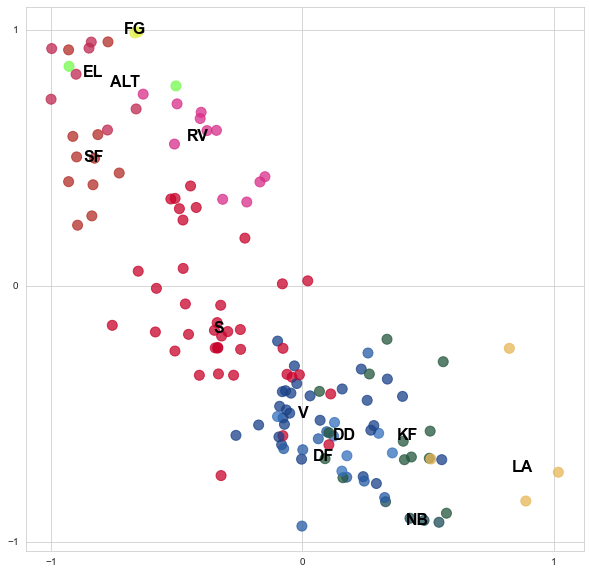

In [407]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)


# plot two variables against each other
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10, 10))

# jitter two variables against each other
jitter(-can['distrib_scale'], can['value_scale'], c=can['color'], s=100, alpha=0.75)

# add label at the median of each group
medians = can.groupby('partyLetter').median().reset_index()
for i, row in medians.iterrows():
    ax.text(-row['distrib_scale'], row['value_scale'], row['partyLetter'], horizontalalignment='center', verticalalignment='center', color='black', weight='bold', size=16)

ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

plt.show()


In [408]:
# load combined_hover and plot_data from validation folder
combined_hover = pd.read_csv('validation/combined_hover.csv')
xy = pd.read_csv('validation/plot_data.csv')


In [409]:
# drop duplicates of full_name
combined_hover = combined_hover.drop_duplicates(subset='full_name', keep='last')

# filter combined_hover to only include politicians in can
combined_hover = combined_hover[combined_hover['full_name'].isin(can['name'])]

# filter xy to only include indeces in combined_hover
xy = xy[xy.index.isin(combined_hover.index)]

In [410]:
# add xy to combined_hover
combined_hover = pd.concat([combined_hover, xy], axis=1)

# join can and combined_hover
merged = can.merge(combined_hover, left_on='name', right_on='full_name')

In [411]:
merged.columns

Index(['name', 'partyLetter', 'okse_afgift', 'co2_afgift', 'lon_sundhed',
       'cig_afgift', '2pct_bnp', 'ulbist_op', 'ulig_mindsk', 'inflat_komp',
       'brugerbet_aeldre', 'ress_aeldre', 'udl_for_stram', 'asyl_rwanda',
       'atomkraft_ja', 'uaf_rus_en', 'ress_pysk_ung', 'ress_pas_boern',
       'su_laan', 'skol_inklus', 'for_hoej_overf', 'behold_arne',
       'mette_rigtig', 'mette_rigsret', 'corona_aaben', 'krav_test_uvac',
       'color_x', 'afgift_scale', 'distrib_scale', 'value_scale', 'doc',
       'party', 'snippet', 'color_y', 'full_name', 'rank', 'x', 'y'],
      dtype='object')

In [412]:
# join parl_data['full_name'].value_counts() to merged
merged = merged.merge(parl_data['full_name'].value_counts().reset_index(), left_on='name', right_on='index').rename(columns={'full_name_y': 'doc_count'})

In [444]:
merged_slice = merged.loc[merged['doc_count']>700]

In [445]:
# pearson r between merged['y'], merged['value_scale']
from scipy.stats import pearsonr
print(pearsonr(-merged_slice['x'], merged_slice['distrib_scale']))
print(pearsonr(merged_slice['y'], merged_slice['value_scale']))

(0.6067791165891308, 0.0001421172275729818)
(0.4755891429040271, 0.004473024338529046)


In [446]:
merged_slice

,name,partyLetter,okse_afgift,co2_afgift,lon_sundhed,cig_afgift,2pct_bnp,ulbist_op,ulig_mindsk,inflat_komp,...,doc,party,snippet,color_y,full_name_x,rank,x,y,index,doc_count
5,Peder Hvelplund,EL,0.5,1.0,1.0,0.5,1.0,1.0,1.0,1.0,...,172.0,EL,tak for det og tak for at få lov til at komme ...,#BF2850,Peder Hvelplund,16.0,-0.240461,0.527031,Peder Hvelplund,1136
12,Simon Kollerup,S,-0.5,-0.5,0.5,0.0,-0.0,-0.5,-0.5,0.5,...,206.0,S,tak for det det er dejligt at se ordføreren i ...,#C8042C,Simon Kollerup,51.0,0.737078,0.002482,Simon Kollerup,706
16,Morten Messerschmidt,DF,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,0.5,1.0,...,162.0,DF,alternativet er jo kendt for nogle helt særlig...,#265BA4,Morten Messerschmidt,34.0,-0.138228,-0.077739,Morten Messerschmidt,2172
19,Søren Søndergaard,EL,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,...,219.0,EL,tak for det det er jo ikke nogen hemmelighed a...,#BF2850,Søren Søndergaard,16.0,-1.000000,-0.463107,Søren Søndergaard,758
21,Rasmus Jarlov,KF,-1.0,1.0,-1.0,0.5,-1.0,-0.5,0.0,0.0,...,191.0,KF,tak for bemærkningerne det er jo min jomfrutal...,#24573E,Rasmus Jarlov,14.0,0.177345,0.188776,Rasmus Jarlov,730
24,Mattias Tesfaye,S,-0.5,0.0,0.5,0.0,-0.5,-0.5,0.5,0.5,...,145.0,S,vi er i socialdemokratiet først og fremmest gl...,#C8042C,Mattias Tesfaye,51.0,-0.132971,0.157124,Mattias Tesfaye,1833
25,Morten Bødskov,S,-0.5,0.5,0.5,0.5,-0.0,-0.5,0.5,0.5,...,159.0,S,tak for det formand jeg synes på ingen måde at...,#C8042C,Morten Bødskov,51.0,-0.010071,0.076265,Morten Bødskov,788
34,Marcus Knuth,KF,-1.0,0.5,0.5,0.0,-1.0,-1.0,-1.0,0.5,...,135.0,V,tak noget af det der ærgrer mig lidt ved socia...,#1A4289,Marcus Knuth,43.0,0.512679,-0.055310,Marcus Knuth,1250
36,Alex Vanopslagh,LA,-1.0,0.0,-0.5,-1.0,-1.0,-1.0,-0.5,0.5,...,1.0,LA,tak for det og tak for den fine udtale af efte...,#E7B657,Alex Vanopslagh,13.0,0.567246,-0.623175,Alex Vanopslagh,747
37,Lars Boje Mathiesen,NB,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,0.5,...,115.0,NB,jeg skal prøve at inddrage hr søren pape pouls...,#1E4B57,Lars Boje Mathiesen,4.0,0.716417,-0.458934,Lars Boje Mathiesen,2000


In [447]:
merged_slice.shape

(34, 40)

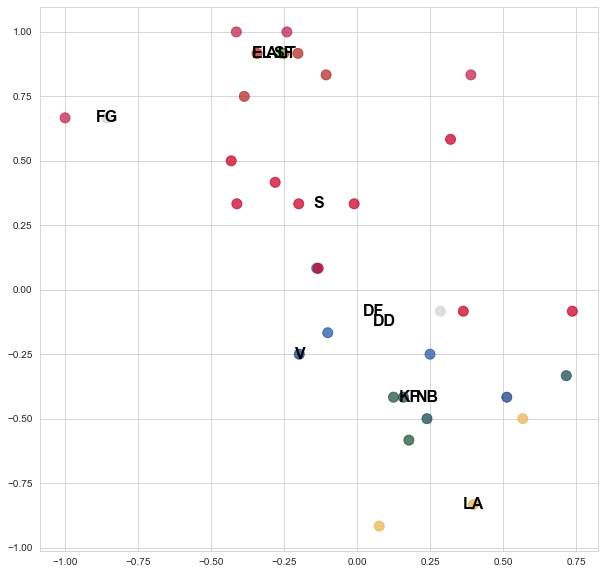

In [448]:
# plot two variables against each other in a scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(merged_slice['x'], merged_slice['distrib_scale'], c=merged_slice['color_y'], s=100, alpha=0.75)

#add party label at median of each group
medians = merged_slice.groupby('partyLetter').median().reset_index()
for i, row in medians.iterrows():
    ax.text(row['x'], row['distrib_scale'], row['partyLetter'], horizontalalignment='center', verticalalignment='center', color='black', weight='bold', size=16)


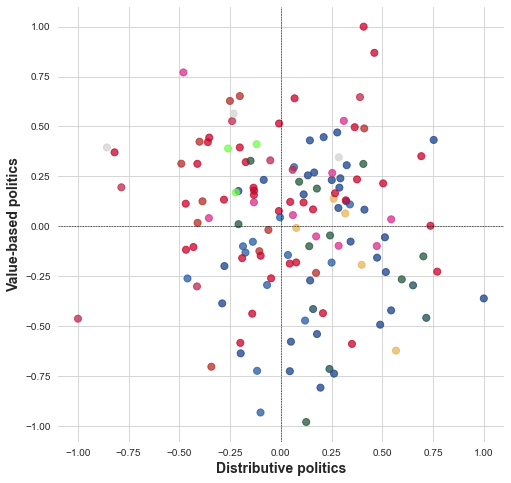

In [449]:
# Initialize the plot and set the axis labels
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111) #, projection='3d'
ax.set_xlabel('Distributive politics', size = 14, weight = 'bold')
ax.set_ylabel('Value-based politics', size = 14, weight = 'bold')
#ax.set_zlabel('Moralised politics')

xs=xy['x']
ys=xy['y']

ax.scatter(xs, ys, s=50, alpha=0.75, color=combined_hover['color'])

# add labels at median of each party
# for party in party_labels['party']:
#     party_emb = normalised_emb[combined_hover['party'] == party]
#     party_xs = party_emb[:,0]
#     party_ys = party_emb[:,1]
#     ax.text(np.median(party_xs), np.median(party_ys), party, size=12, color='black', weight = 'bold', path_effects=[pe.withStroke(linewidth=4, foreground='white')])


# add vline to plot
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
ax.axhline(y=-0, color='black', linestyle='--', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

# Show the plot
plt.show()